<a href="https://colab.research.google.com/github/pmb-7684/Data_Mining_Project_3/blob/main/DM_project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Overview of Project
#### Paula McCree-Bailey

The main goal of Project 3 is to get experience working with a regression problem. The goal is to create a blog that includes (1) an introduction to topic and dataset. Next, (2) discuss what regression is and how it works (specifically linear regression). Math for bonus points. Then, (3) discuss experiments with different types of regression. Lastly, (4) conclude with what you have learned from this project.



### **Introduction**

Fossil fuel can be a double-edged sword offering both positive and negative opportunities.  It can offer wealth to countries to fuel their economies and gasoline (plus byproducts) to offer mobility and comfort in the form of electricity for their citizens.  On the other hand, fossil fuel can be devastating to the environment if it is extracted incorrectly, and it is not an infinite resource.

A promising renewable energy resource is the use of wave farms to create energy.  The ocean covers 70% of the earth's surface.  It is also about 97% of all water on Earth.  The abundance of the oceans is a major reason to explore wave farming as an option for energy.

My project is based on the white paper [Optimisation of Large Wave Farms Using A Multi-Strategy Evolutionary Framework](https://drive.google.com/file/d/1WPVM3WzIP5SFv4GOJZVT6KZOgOme0ALp/view?usp=drive_link). The primary goal of their "research is to maximise the total harnessed power of a large wave farm consisting of fully submerged three-tether wave energy converters (WECs)." Specifically, the study looked at wave farms in Perth and Sydney, Australia which contained over twenty convertors. The research included six modern algorithms, four discrete search techniques and three hybrid optimization methods.

This regression project focuses on research on the Perth 49 converter wave farm.

##### **Perth Wave Power Project**
Perth Wave Power Project is an offshore development in Western Australia that went live in February 2015. At that time, the energy generated was able to power 3,500 households.  It is expected to reduce greenhouse gas emission by more than 500,000t over the life of the project.

The wave converters use large buoys tied to the sea floor by a rope.  As the buoy rises and falls with each passing wave, the rope tightens causes high pressures.  These pressures are piped to shore where it powers water desalination plants and produces electricity.

The goal is to predict the total power output based on the coordination of the wave energy converters (WECs) within a large wave farm.  By demonstrating the benefits of wave energy maybe we can change a few minds to invest in wave energy.




Image loaded successfully. Dimensions: 1190x584, Mode: P


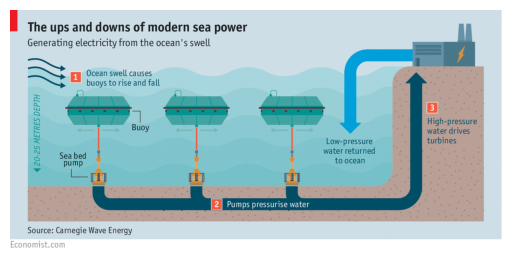

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
import pandas as pd
import seaborn as sns
import statsmodels.api as sm


image_path = '/content/sample_data/Wave_Energy.png'
image = Image.open(image_path)

# Display image properties (width, height, mode)
width, height = image.size
mode = image.mode
print(f"Image loaded successfully. Dimensions: {width}x{height}, Mode: {mode}")
image.show()


plt.imshow(image)
plt.axis('off')
plt.show()


### **DataSet**

The data set was donated on 09/16/2023 to UC Irvine Machine Learning Repository. It includes 4 CSV files for wave energy converters farms based in Perth and Sydney, Australia.  Each city contains two files, one containing information on 49 wave energy converters (buoys) and another containing 100 wave energy converters. The total project contains 63,600 observations and 149 features.

The Perth Wave 49 dataset was used for this project.  It contains 36,044 observations and 149 features.

Each instance or observation represents the location of WECs in the wave farm plus the total power output and individual power of each converter and q-factor.

The features are :
*   $X_1,...,X_n$ are the X coordinates for the location of the $X_i$ buoy.

*   $Y_1,...,Y_n$ are the corresponding Y coordinates for the location of the $X_i$ buoy.
*   $Power_1,...,Power_n$ is the Power generated by the buoy $X_i Y_i$.
*   qW is the q-factor is calculated as the ratio of the power generated by the entire wave farm to the sum of power outputs from all WECs if they operate in isolation but not in a farm. generated by the buoy $X_i Y_i$. This feature was not clearly defined on the website.

 A values qW > 1 indicates this particular farm benefits from the constructive interaction between WECs, and more
energy can be generated if these WECs operate together.

*   Total Power is the total power generated by the buoys during the observational period.

[Large-scale Wave Energy Farm](https://archive.ics.uci.edu/dataset/882/large-scale+wave+energy+farm)




### **What is regression and how does it work?**

 Linear regression finds the best relationship using a straight line between independent and dependent variable. this best fit line predicts the value of the dependent  based on the independent variables and minimizes the differences between the predicted and actual.

 One common method for finding the "best-fit" line is the use of ordinary least squares method.
1.   Calculate the Total Sum of Squares (SST) which is the difference between the mean value and the actual value squared and summed.

  SST$ = \sum_{i=1}^n (y_i - ybar_i)^2$
2.   

3.  

Linear regression was used to create a baseline for the project.

Specifically, GRadient Descent Algorithm, a form of
Explain what regression is and how it works (specifically linear regression, as we have covered it in class OR if you used a different regression model, you may explain that one instead if prefererd). Bonus points for math (up to 5 bonus points for very good explanations).

In [2]:
wave_df = pd.read_csv("/content/sample_data/WEC_Perth_49.csv")
wave_df.head(3)

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power
0,600.0,0.0,546.16,37.5,489.79,74.88,432.47,112.05,650.0,0.0,...,88867.92,98844.30,101283.59,98934.63,101624.58,100915.03,99625.68,96704.34,0.87,4102461.43
1,593.0,12.0,546.16,37.5,489.79,74.88,432.47,112.05,644.0,8.0,...,88896.55,98759.79,101346.07,98873.59,101629.01,100934.53,99606.13,96718.39,0.87,4103361.41
2,593.0,12.0,546.16,37.5,489.79,74.88,432.47,112.05,644.0,8.0,...,88919.83,98746.68,101346.15,98875.57,101618.32,100941.00,99611.35,96719.14,0.87,4103680.44


In [3]:
wave_df.shape

(36043, 149)

### **Data understanding**

Before diving right into the work, what steps do you take to first gain an understanding of your data? For example, are any features correlated with each other? Are there any existing patterns? What visualizations can you make to help gain this initial understanding?

NOTES
Specifically, write about your thought processes as you are going through each of your experiments. What pre-processing steps did you take and why? What features did you include or exclude and why? What types of regression model(s) did you try and why? Have at least three different experiments (this is a part of the rubric).

to

In [4]:
wave_df.describe()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power
count,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,...,36043.000000,36043.00000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,3.604300e+04
mean,366.597060,18.709550,426.314033,51.085762,477.295590,57.846020,497.150488,73.323178,684.309548,44.012247,...,93678.772248,96530.68484,96666.293181,97007.214249,98466.265281,98106.278501,97462.663041,96134.920454,0.833849,3.938246e+06
std,307.911246,44.043295,265.781316,90.151852,270.322011,42.143917,279.631344,51.140816,237.862684,59.242702,...,7401.226140,6709.53446,7020.690028,4829.877255,4978.194259,4263.508074,3134.420742,3889.098339,0.026052,1.226171e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,52516.130000,56391.97000,53877.360000,53050.330000,55401.380000,63028.260000,61717.310000,47257.430000,0.720000,3.388944e+06
25%,65.770000,0.000000,200.000000,0.000000,289.950000,50.000000,300.000000,50.000000,600.000000,0.000000,...,88177.210000,94648.08000,96932.520000,97612.350000,97629.940000,97154.630000,96869.740000,96319.550000,0.810000,3.847335e+06
50%,250.000000,0.000000,346.090000,37.520000,400.000000,74.820000,500.000000,100.000000,700.000000,0.080000,...,93694.540000,98729.91000,99269.310000,98857.150000,100423.930000,99805.920000,98710.730000,96543.090000,0.830000,3.931541e+06
75%,600.000000,0.000000,745.980000,37.900000,689.800000,74.960000,632.750000,112.150000,850.000000,50.000000,...,100997.520000,100622.52000,100282.360000,99156.130000,101370.970000,100955.350000,99064.495000,97036.300000,0.860000,4.063623e+06
max,1000.000000,885.590000,1000.000000,939.260000,1000.000000,990.000000,1000.000000,990.000000,1000.000000,919.590000,...,110945.940000,109400.43000,114194.520000,106702.150000,104751.350000,102892.110000,102275.480000,101876.140000,0.880000,4.177659e+06


In [5]:
wave_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36043 entries, 0 to 36042
Columns: 149 entries, X1 to Total_Power
dtypes: float64(149)
memory usage: 41.0 MB


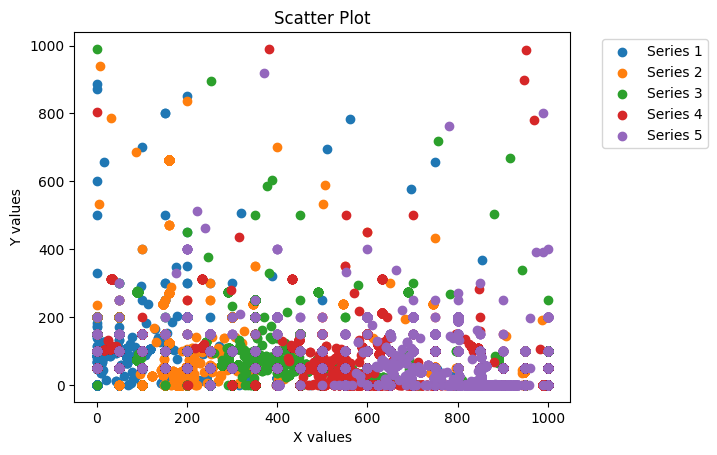

In [6]:
plt.scatter(wave_df['X1'], wave_df['Y1'], label='Series 1')
plt.scatter(wave_df['X2'], wave_df['Y2'], label='Series 2')
plt.scatter(wave_df['X3'], wave_df['Y3'], label='Series 3')
plt.scatter(wave_df['X4'], wave_df['Y4'], label='Series 4')
plt.scatter(wave_df['X5'], wave_df['Y5'], label='Series 5')

plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Scatter Plot')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()


Rather than trying to visualize 149*49 = 7,301 data plot on a scatterplot.  The decsion was made to view the points with the highest Total_Power.   These observation would capture the best interacation between X1, Y1, ..., X49, and Y49.  After applying the code, I was surprised to see that the top 10 observations with the best Total_Power seem to be duplications.

In [7]:
TopPower = wave_df.nlargest(10,'Total_Power')
TopPower

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power
20872,800.0,0.0,746.03,37.52,689.8,75.11,632.36,112.37,850.0,50.0,...,110553.39,108624.46,105969.84,100194.76,103267.61,102743.17,100523.17,96618.52,0.88,4177658.97
27556,800.0,0.0,746.03,37.52,689.8,75.11,632.36,112.37,850.0,50.0,...,110553.39,108624.46,105969.84,100194.76,103267.61,102743.17,100523.17,96618.52,0.88,4177658.97
27557,800.0,0.0,746.03,37.52,689.8,75.11,632.36,112.37,850.0,50.0,...,110553.39,108624.46,105969.84,100194.76,103267.61,102743.17,100523.17,96618.52,0.88,4177658.97
27558,800.0,0.0,746.03,37.52,689.8,75.11,632.36,112.37,850.0,50.0,...,110553.39,108624.46,105969.84,100194.76,103267.61,102743.17,100523.17,96618.52,0.88,4177658.97
27559,800.0,0.0,746.03,37.52,689.8,75.11,632.36,112.37,850.0,50.0,...,110553.39,108624.46,105969.84,100194.76,103267.61,102743.17,100523.17,96618.52,0.88,4177658.97
27560,800.0,0.0,746.03,37.52,689.8,75.11,632.36,112.37,850.0,50.0,...,110553.39,108624.46,105969.84,100194.76,103267.61,102743.17,100523.17,96618.52,0.88,4177658.97
27561,800.0,0.0,746.03,37.52,689.8,75.11,632.36,112.37,850.0,50.0,...,110553.39,108624.46,105969.84,100194.76,103267.61,102743.17,100523.17,96618.52,0.88,4177658.97
27562,800.0,0.0,746.03,37.52,689.8,75.11,632.36,112.37,850.0,50.0,...,110553.39,108624.46,105969.84,100194.76,103267.61,102743.17,100523.17,96618.52,0.88,4177658.97
27563,800.0,0.0,746.03,37.52,689.8,75.11,632.36,112.37,850.0,50.0,...,110553.39,108624.46,105969.84,100194.76,103267.61,102743.17,100523.17,96618.52,0.88,4177658.97
27564,800.0,0.0,746.03,37.52,689.8,75.11,632.36,112.37,850.0,50.0,...,110553.39,108624.46,105969.84,100194.76,103267.61,102743.17,100523.17,96618.52,0.88,4177658.97


In [8]:
# Remove all duplicates, keeping only the first occurrence
wave_dups = wave_df.drop_duplicates(keep='first')
#wave_df.drop_duplicates(inplace=True)
wave_dups

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power
0,600.0,0.0,546.16,37.50,489.79,74.88,432.47,112.05,650.0,0.0,...,88867.92,98844.30,101283.59,98934.63,101624.58,100915.03,99625.68,96704.34,0.87,4102461.43
1,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88896.55,98759.79,101346.07,98873.59,101629.01,100934.53,99606.13,96718.39,0.87,4103361.41
2,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88919.83,98746.68,101346.15,98875.57,101618.32,100941.00,99611.35,96719.14,0.87,4103680.44
3,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88855.14,98760.96,101338.59,98971.58,101632.28,100943.59,99589.25,96735.04,0.87,4105661.06
4,200.0,0.0,146.17,37.53,89.76,74.93,32.40,112.18,400.0,0.0,...,88005.30,98630.24,100432.73,98803.01,101064.48,100948.38,99028.87,96286.71,0.79,3752648.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36038,100.0,250.0,250.00,250.00,300.00,200.00,400.00,100.00,900.0,150.0,...,100382.68,90042.10,99539.28,100219.37,70180.74,98693.05,100739.06,100530.96,0.86,4048188.53
36039,250.0,200.0,500.00,150.00,350.00,200.00,700.00,500.00,50.0,250.0,...,97576.89,89874.39,99413.89,83966.40,74140.17,66977.16,99768.78,92788.85,0.85,4033017.16
36040,200.0,100.0,400.00,100.00,350.00,500.00,750.00,200.00,700.0,250.0,...,101072.75,98181.96,77322.16,77632.27,102878.91,83002.93,91852.61,98283.28,0.86,4048053.62
36041,500.0,250.0,350.00,350.00,1000.00,250.00,550.00,150.00,800.0,0.0,...,99078.22,101120.28,73597.78,102042.99,58438.65,98804.39,66383.44,97423.85,0.86,4062515.64


By removing the duplicate observations, it reduced our data set from 36,044 to 10,936 observations.   Initially, I was concerned about the duplications, but it made sense.  The wave converter is floating in the ocean and unless there is a storm, a change in the location of the converter or in the current, we should expect there to be limited changes


Now, let’s look at the Total_Power for the top twenty observations (X1, Y2, … ,X49, and Y49) or first 980 data points.  From this small sample, in general, the converters in locations between (X: 0 - 1000) and (Y: 0 - 350) as a collective produce the greatest amount of energy.


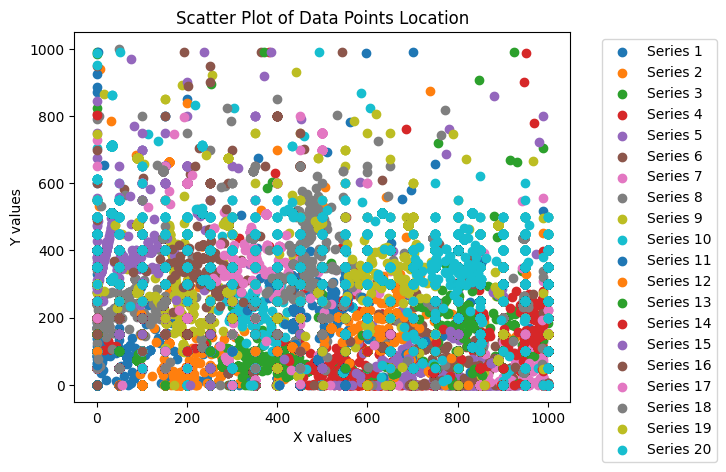

In [9]:
#TopPower = wave_dups.nlargest(5,'Total_Power')
TopPower = wave_dups.sort_values(by = ['Total_Power'])
plt.scatter(TopPower['X1'], TopPower['Y1'], label='Series 1')
plt.scatter(TopPower['X2'], TopPower['Y2'], label='Series 2')
plt.scatter(TopPower['X3'], TopPower['Y3'], label='Series 3')
plt.scatter(TopPower['X4'], TopPower['Y4'], label='Series 4')
plt.scatter(TopPower['X5'], TopPower['Y5'], label='Series 5')
plt.scatter(TopPower['X6'], TopPower['Y6'], label='Series 6')
plt.scatter(TopPower['X7'], TopPower['Y7'], label='Series 7')
plt.scatter(TopPower['X8'], TopPower['Y8'], label='Series 8')
plt.scatter(TopPower['X9'], TopPower['Y9'], label='Series 9')
plt.scatter(TopPower['X10'], TopPower['Y10'], label='Series 10')
plt.scatter(TopPower['X11'], TopPower['Y11'], label='Series 11')
plt.scatter(TopPower['X12'], TopPower['Y12'], label='Series 12')
plt.scatter(TopPower['X13'], TopPower['Y13'], label='Series 13')
plt.scatter(TopPower['X14'], TopPower['Y14'], label='Series 14')
plt.scatter(TopPower['X15'], TopPower['Y15'], label='Series 15')
plt.scatter(TopPower['X16'], TopPower['Y16'], label='Series 16')
plt.scatter(TopPower['X17'], TopPower['Y17'], label='Series 17')
plt.scatter(TopPower['X18'], TopPower['Y18'], label='Series 18')
plt.scatter(TopPower['X19'], TopPower['Y19'], label='Series 19')
plt.scatter(TopPower['X20'], TopPower['Y20'], label='Series 20')


plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Scatter Plot of Data Point''s Location')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

### **Experiment 1: Pre-processing**

After the initial understanding, what steps need to be taken? Do you need to deal with null values? What features are you going to try using for your first experiment and why? Do you need to transform any features (e.g., change from categorical to numerical)? Are you trying to create any new features to use?

From the initial data understanding, there are no null or missing values.  Also, confirmed those results with python code `wave_dups.isna().sum()` and `wave_dups.describe()` which was used above.

In [10]:
wave_dups.shape

(10936, 149)

In [11]:
wave_dups.isna().sum()

,0
X1,0
Y1,0
X2,0
Y2,0
X3,0
...,...
Power47,0
Power48,0
Power49,0
qW,0


In [12]:
X = wave_dups.drop(columns = ['Total_Power'])
y = wave_dups['Total_Power']


### Experiment 1:Modeling  --To BE COMPLETED
Create a linear regression model for your first experiment.

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.htmlLinks to an external site.


Links to an external site.


Links to an external site.


Links to an external site. to an external site.

In [13]:
# linear regression

"""
X = [['X1',	'Y1'],	['X2',	'Y2'],	['X3',	'Y3'],	['X4',	'Y4'],	['X5',	'Y5'],	['X6',	'Y6'],	['X7',	'Y7'],	['X8',	'Y8'],	['X9',	'Y9'],	['X10',	'Y10'], ['X11','Y11']	,['X12'	,'Y12'],['X13','Y13']	,['X14','Y14']	,['X15',	'Y15'],['X16'	,'Y16']	,['X17',	'Y17']	,['X18'	,'Y18'],['X19'	,'Y19']	,['X20',	'Y20'],
      ['X21','Y21'],	['X22',	'Y22'],['X23','Y23']	,['X24','Y24'],['X25',	'Y25']	,['X26'	,'Y26']	,['X27'	,'Y27']	,['X28'	,'Y28'],	['X29',	'Y29']	,['X30',	'Y30'], ['X31',	'Y31'],	['X32'	,'Y32'],['X33','Y33']	,['X34','Y34']	,['X35'	,'Y35']	,['X36',	'Y36'],	['X37',	'Y37']	,['X38',	'Y38'],	['X39'	,'Y39'],['X40',	'Y40'],
      ['X41',	'Y41'],	['X42',	'Y42'],	['X43'	,'Y43'],	['X44','Y44']	,['X45'	,'Y45'],['X46',	'Y46']	,	['X47',	'Y47'],	['X48',	'Y48'],['X49'	,'Y49']	,'Power1' ,'Power2',	'Power3',	'Power4',	'Power5',	'Power6',	'Power7',	'Power8',	'Power9', 'Power10',
      'Power11' ,'Power12',	'Power13',	'Power14',	'Power15',	'Power16',	'Power17',	'Power18',	'Power19', 'Power20', 'Power21' ,'Power22',	'Power23',	'Power24',	'Power25',	'Power26',	'Power27',	'Power28',	'Power29', 'Power30',
      'Power31' ,'Power32',	'Power33',	'Power34',	'Power35',	'Power36',	'Power37',	'Power38',	'Power39', 'Power40','Power41','Power42',	'Power43',	'Power44',	'Power45',	'Power46',	'Power47',	'Power48',	'Power49',	'qW']
y = [['Total_Power']]
"""


"\nX = [['X1',\t'Y1'],\t['X2',\t'Y2'],\t['X3',\t'Y3'],\t['X4',\t'Y4'],\t['X5',\t'Y5'],\t['X6',\t'Y6'],\t['X7',\t'Y7'],\t['X8',\t'Y8'],\t['X9',\t'Y9'],\t['X10',\t'Y10'], ['X11','Y11']\t,['X12'\t,'Y12'],['X13','Y13']\t,['X14','Y14']\t,['X15',\t'Y15'],['X16'\t,'Y16']\t,['X17',\t'Y17']\t,['X18'\t,'Y18'],['X19'\t,'Y19']\t,['X20',\t'Y20'],\n      ['X21','Y21'],\t['X22',\t'Y22'],['X23','Y23']\t,['X24','Y24'],['X25',\t'Y25']\t,['X26'\t,'Y26']\t,['X27'\t,'Y27']\t,['X28'\t,'Y28'],\t['X29',\t'Y29']\t,['X30',\t'Y30'], ['X31',\t'Y31'],\t['X32'\t,'Y32'],['X33','Y33']\t,['X34','Y34']\t,['X35'\t,'Y35']\t,['X36',\t'Y36'],\t['X37',\t'Y37']\t,['X38',\t'Y38'],\t['X39'\t,'Y39'],['X40',\t'Y40'],\n      ['X41',\t'Y41'],\t['X42',\t'Y42'],\t['X43'\t,'Y43'],\t['X44','Y44']\t,['X45'\t,'Y45'],['X46',\t'Y46']\t,\t['X47',\t'Y47'],\t['X48',\t'Y48'],['X49'\t,'Y49']\t,'Power1' ,'Power2',\t'Power3',\t'Power4',\t'Power5',\t'Power6',\t'Power7',\t'Power8',\t'Power9', 'Power10',\n      'Power11' ,'Power12',\t'Power13',\t'P

In [14]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

### Experiment 1: Evaluation  --To BE COMPLETED

Evaluate your first model. For example, use root mean squared error (RMSE).

Note: if you would like to try submitting your work to the competition, their submissions are evaluated using RMSE. Submitting to the competition is not required, but it might be fun to experience! More information on how to submit is under the "Overview" tab, then "Evaluation."

In [15]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Make predictions
y_pred = model.predict(X_test)

In [17]:
print(model.score(X_test,y_test))

0.9999952168386783


In [18]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 78832.65844131113


In [19]:
rmse = root_mean_squared_error(y_test, y_pred)
print(f'Root Mean Squared Error:  {rmse}')

Root Mean Squared Error:  280.7715413664838


### Experiment 2  --To BE COMPLETED - - OLS

For the next experiment, discuss what you try changing compared to the first experiment. For example, do you want to experiment with different features? Are you trying a different model? Then, talk about your results and how it changes from the previous experiment.

### Experiment 2  --To BE COMPLETED - - Gradient

For the next experiment, discuss what you try changing compared to the first experiment. For example, do you want to experiment with different features? Are you trying a different model? Then, talk about your results and how it changes from the previous experiment.

### Experiment 3  --To BE COMPLETED - RF Regressor

For both linear regression and ordinary least squares, the results seem to indicate that the model overfitted.  Both the overall fit was 99.9% almost perfect.  

(Same as above.)
For the next experiment, discuss what you try changing compared to the first experiment. For example, do you want to experiment with different features? Are you trying a different model? Then, talk about your results and how it changes from the previous experiment.

### Impact Section --To BE COMPLETED

Discuss the possible impact of your project. This can be socially, ethically, etc. It cannot be something like "our project has no impact" or "our project has no negative impact." Even the most well-intentioned projects *could* have a negative impact. We will not be checking for "right" or "wrong" answers, but showing your critical thinking.

### Conclusion  --To BE COMPLETED

Discuss what you have learned from this project and through the different experiments. For example, did certain pre-processing steps help improve the model? Did you try using feature selection, and including/excluding certain features improve performance?

### References

*   [Optimisation of large wave farms using a multi-strategy evolutionary framework](https://www.semanticscholar.org/paper/153a3eeff91e73eb45338719579a900972f7a9ca)
* Neshat, Mehdi, Bradley Alexander, Nataliia Y. Sergiienko, and Markus Wagner. "Optimisation of large wave farms using a multi-strategy evolutionary framework." In Proceedings of the 2020 Genetic and Evolutionary Computation Conference, pp. 1150-1158. 2020.
*   https://education.nationalgeographic.org/resource/all-about-the-ocean/


*   https://www.power-technology.com/projects/perth-wave-energy-project/
*   https://createdigital.org.au/wave-energy-landscape/

*   https://www.abc.net.au/news/2022-07-31/wave-power-generator-supplying-king-island-with-electricity/101282070
* https://www.abc.net.au/listen/programs/scienceshow/perth-wave-energy-project-producing-power-and-fresh-water/6507450
* https://medium.com/@ingaleashay/loading-and-displaying-images-in-google-colab-a-guide-with-opencv-pil-and-matplotlib-d13bf5b8fe6b
* https://www.geeksforgeeks.org/how-to-place-legend-outside-of-the-plot-in-matplotlib/